<a href="https://colab.research.google.com/github/Trieunguyen1/BAI_TAP_AI/blob/main/phan_biet_4_loai_banh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount("/content/drive",force_remount=True)

Mounted at /content/drive


In [3]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
training_data=train_datagen.flow_from_directory('/content/drive/MyDrive/phan_biet_4_loai_banh/train_4_loai_banh',
                                               target_size=(150,150),
                                               batch_size=32,
                                               class_mode ='categorical')
validation_data=train_datagen.flow_from_directory('/content/drive/MyDrive/phan_biet_4_loai_banh/test_4_banh',
                                               target_size=(150,150),
                                               batch_size=32,
                                               class_mode ='categorical')

Found 79 images belonging to 4 classes.
Found 40 images belonging to 4 classes.


In [9]:
model=Sequential()
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer = 'he_uniform'))
#model.add(Dropout(0.2))
model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 150, 150, 128)     3584      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 75, 75, 128)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 75, 75, 32)        36896     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 43808)             0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [10]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [11]:
callbacks=[EarlyStopping(monitor='val_loss',patience=20)]
history=model.fit(training_data,
                  steps_per_epoch=len(training_data),
                  batch_size = 64,
                  epochs=100,
                  validation_data=validation_data,
                  validation_steps=len(validation_data),
                  callbacks=callbacks,
                  verbose = 1)

Epoch 1/100
3/3 [==============================] - 17s 7s/step - loss: 15.6970 - accuracy: 0.2658 - val_loss: 4.2321 - val_accuracy: 0.2500
Epoch 2/100
3/3 [==============================] - 8s 2s/step - loss: 2.5902 - accuracy: 0.2405 - val_loss: 1.3681 - val_accuracy: 0.2500
Epoch 3/100
3/3 [==============================] - 8s 3s/step - loss: 1.3782 - accuracy: 0.2911 - val_loss: 1.3845 - val_accuracy: 0.3250
Epoch 4/100
3/3 [==============================] - 8s 3s/step - loss: 1.3851 - accuracy: 0.2911 - val_loss: 1.3860 - val_accuracy: 0.3000
Epoch 5/100
3/3 [==============================] - 8s 3s/step - loss: 1.3863 - accuracy: 0.2658 - val_loss: 1.3861 - val_accuracy: 0.3000
Epoch 6/100
3/3 [==============================] - 8s 2s/step - loss: 1.3861 - accuracy: 0.2658 - val_loss: 1.3863 - val_accuracy: 0.2500
Epoch 7/100
3/3 [==============================] - 8s 3s/step - loss: 1.3861 - accuracy: 0.2658 - val_loss: 1.3859 - val_accuracy: 0.2750
Epoch 8/100
3/3 [===============

Sai số kiểm tra là:  0.034017253667116165
Độ chính xác kiểm tra là:  1.0


<function matplotlib.pyplot.show>

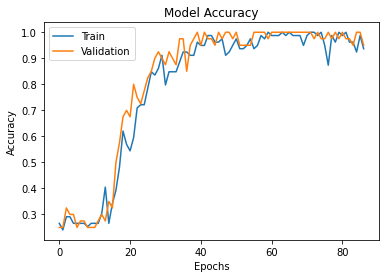

In [12]:
#đánh giá chất lượng của mô hình và vẽ lại
score = model.evaluate(validation_data,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [ ]:
model.save('model_phan_biet_4_loai_banh.h5')
model=load_model('model_phan_biet_4_loai_banh.h5')

banhdalon


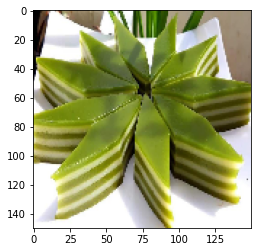

In [13]:
img=load_img("/content/drive/MyDrive/phan_biet_4_loai_banh/prediction_4_banh/banhdalon.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='banhdalon'
if round(result[0][1])==1:
  prediction='banhhoi'
if round(result[0][2])==1:
  prediction='banhout'
if round(result[0][3])==1:
  prediction='banhxeo'

print(prediction)

banhxeo


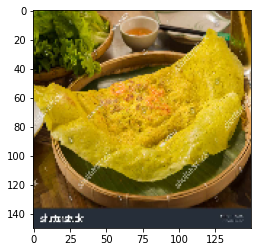

In [15]:
img=load_img("/content/drive/MyDrive/phan_biet_4_loai_banh/prediction_4_banh/banhxeo.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='banhdalon'
if round(result[0][1])==1:
  prediction='banhxeo'
if round(result[0][2])==1:
  prediction='banhout'
if round(result[0][3])==1:
  prediction='banhhoi'

print(prediction)

banhhoi


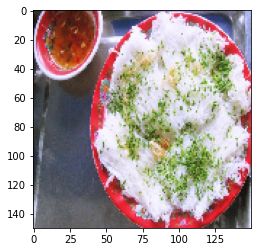

In [16]:
img=load_img("/content/drive/MyDrive/phan_biet_4_loai_banh/prediction_4_banh/banhhoi.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='banhdalon'
if round(result[0][1])==1:
  prediction='banhhoi'
if round(result[0][2])==1:
  prediction='banhout'
if round(result[0][3])==1:
  prediction='banhxeo'

print(prediction)

banhout


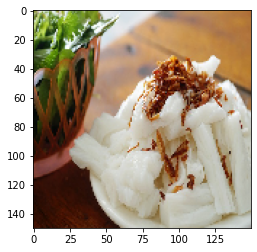

In [17]:
img=load_img("/content/drive/MyDrive/phan_biet_4_loai_banh/prediction_4_banh/banhuot.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='banhdalon'
if round(result[0][1])==1:
  prediction='banhhoi'
if round(result[0][2])==1:
  prediction='banhout'
if round(result[0][3])==1:
  prediction='banhxeo'

print(prediction)

In [ ]:
# link data:https://drive.google.com/drive/folders/1T8JFnZ4Gl5cOsuligAuzfafaiyV-_MXj?usp=sharing